In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.random.random()

0.5167529313867513

In [3]:
def random_ab(a, b):
    return (b-a)*np.random.random() + a

# Pi

In [4]:
def inside_circle(x, y, r):
    return x**2 + y**2 <= r**2

In [18]:
def monte_carlo_pi(max_iter=200000):
    hits = 0
    for i in range(max_iter):
        x, y = np.random.random(2)
        hits += inside_circle(x, y, r=1)
    return 4*hits/max_iter

In [19]:
monte_carlo_pi()

3.14274

# Buffon

In [21]:
def buffon(r, max_iter=1000):
    hits = 0
    for i in range(max_iter):
        theta, u = random_ab(-np.pi/2, np.pi/2), np.random.random()
        hit = u > 1 - r*np.cos(theta)
        hits += hit
    return hits/max_iter

In [27]:
buffon(100000)

1.0

# Inverse Sampling

In [29]:
def f(x, L):
    return L*np.exp(-L*x)

def F(x, L):
    return 1 - np.exp(-L*x)

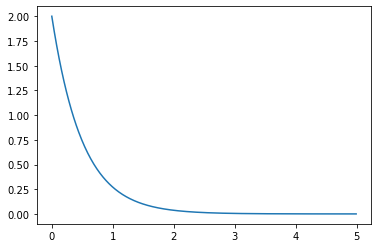

In [34]:
x = np.arange(0, 5, 0.01)
L = 2
plt.plot(x, f(x, L))

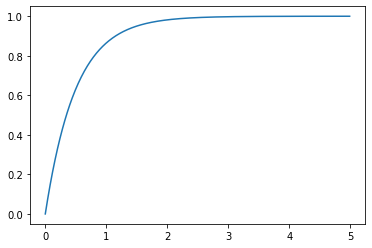

In [35]:
x = np.arange(0, 5, 0.01)
L = 2
plt.plot(x, F(x, L))

In [43]:
def f_inv(u, L):
    return -np.log(1-u)/L

In [44]:
def sample_arrival(n, L):
    u = np.random.random(n)
    return f_inv(u, L)

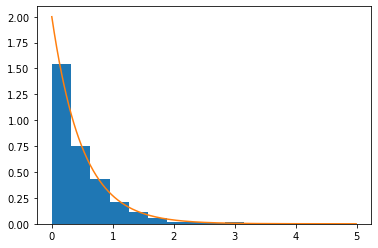

In [48]:
L=2
samples = sample_arrival(1000, L)
plt.hist(samples, density=True)
plt.plot(x, f(x, L))

# Rejection Sampling

In [51]:
def f(x):
    return 20*x*(1-x)**3

def g(x):
    return 1

c = 135/64

def rejection():
    u1, u2 = np.random.random(2)
    hit = u2 < f(u1)/(c*g(u1))
    if hit:
        return u1
    else:
        return rejection()

In [58]:
samples = [rejection() for i in range(10000)]

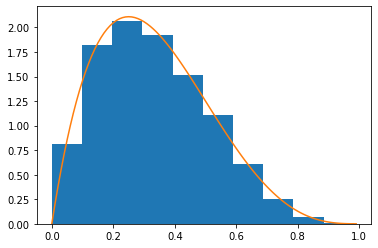

In [59]:
x = np.arange(0, 1, 0.01)
plt.hist(samples, density=True)
plt.plot(x, f(x))